In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import matplotlib.pyplot as plt
import string_realisations as SR

/home/tomcharnock/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 4.276883e+02
  AccuracyWarning)


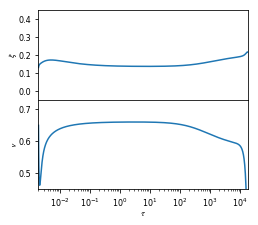

In [2]:
E = SR.Evolution()
E.evolution_plot()

/home/tomcharnock/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.474720e+02
  AccuracyWarning)
100%|██████████| 10/10 [00:31<00:00,  3.08s/it]


time taken =  85.00999999999999


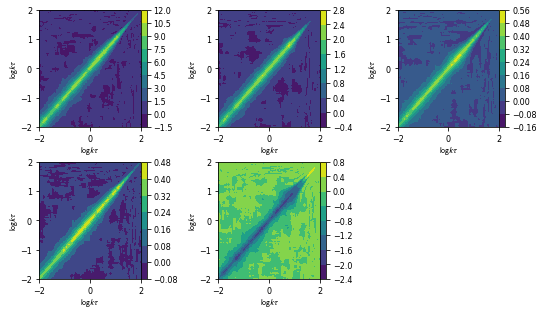

In [3]:
t_i = time.clock()
S = SR.Strings(C = SR.Constants(Omega_b = 0.25, Omega_c = 0.75, Omega_v = 0, Neff = 0.), S = SR.StringParameters(num_rel = 100))
uetc = S.uetc(512, 1, 5e-3, 5e2, loop = 10)
t_f = time.clock()
print('time taken = ', t_f - t_i)
S.plot_uetc(uetc, 512, 1, 1e-2, 1e2)

/home/tomcharnock/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.474720e+02
  AccuracyWarning)


time taken =  59.71000000000001


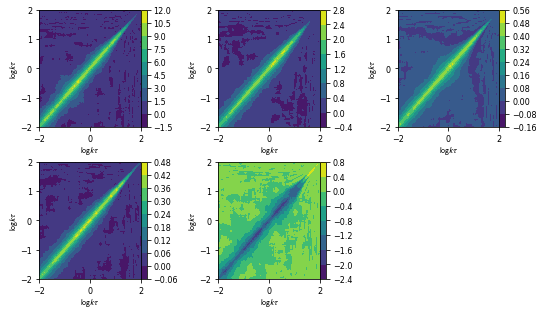

In [4]:
t_i = time.clock()
S = SR.Strings(C = SR.Constants(Omega_b = 0.25, Omega_c = 0.75, Omega_v = 0, Neff = 0.), S = SR.StringParameters(num_rel = 1000))
uetc = S.uetc(512, 1, 5e-3, 5e2)
t_f = time.clock()
print('time taken = ', t_f - t_i)
S.plot_uetc(uetc, 512, 1, 1e-2, 1e2)

In [ ]:
l_i = 100
l_f = 10000
num = 20
total_number_realisations = 100000
loops = np.logspace(np.log10(l_i), np.log10(l_f), num)
results = []
times = []
in_loop = []
for i in range(num):
    loop = int(loops[i]) 
    realisation = total_number_realisations / loop
    while realisation != float(int(realisation)):
        loop += 1
        realisation = total_number_realisations / loop
    realisation = int(realisation)
    print(realisation)
    t_i = time.clock()
    S = SR.Strings(C = SR.Constants(Omega_b = 0.25, Omega_c = 0.75, Omega_v = 0, Neff = 0.), S = SR.StringParameters(num_rel = realisation, s = 0))
    beta1 = S.get_ktau(1, 1., 0.1, None)
    beta2 = S.get_ktau(1, 1., 0.1, None)
    beta3 = S.get_ktau(1, 1., 0.1, None)
    results.append(S.calculate_correlator_single(beta1, beta2, beta3, loop = loop))
    t_f = time.clock()
    times.append(t_f - t_i)
    in_loop.append(loop)
fig, ax = plt.subplots(1, 2,figsize = (10, 5), sharey = True)
ax[0].plot(in_loop, times)
ax[0].set_xlabel('Number of loops')
ax[0].set_ylabel('Time')
ax[0].set_xscale('log')
in_real = []
for loop in in_loop:
    realisation = int(total_number_realisations / loop)
    realisation = int(realisation)
    in_real.append(realisation)
indices = np.argsort(in_loop)
ax[1].plot([in_real[i] for i in indices], [times[i] for i in indices])
ax[1].set_xlabel('Number of realisations')
ax[1].set_ylabel('Time [s]')
ax[1].set_xscale('log')
print(in_real[np.argmin(times)])

1000


/home/tomcharnock/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.474720e+02
  AccuracyWarning)
100%|██████████| 100/100 [47:29<00:00, 28.76s/it]


625


100%|██████████| 160/160 [36:31<00:00, 13.83s/it]


500


100%|██████████| 200/200 [31:33<00:00,  9.23s/it]


400


100%|██████████| 250/250 [30:42<00:00,  7.43s/it]


250


100%|██████████| 400/400 [30:46<00:00,  4.58s/it]


250


100%|██████████| 400/400 [30:37<00:00,  4.59s/it]


200


100%|██████████| 500/500 [30:47<00:00,  3.70s/it]


160


100%|██████████| 625/625 [30:41<00:00,  2.94s/it]


125


 82%|████████▏ | 658/800 [24:10<05:13,  2.21s/it]

In [48]:
np.savez('data/results.npz', results = results, in_loop = in_loop, times = times)

[-0.07513306  0.00958266  0.00143232  0.00051991]
14


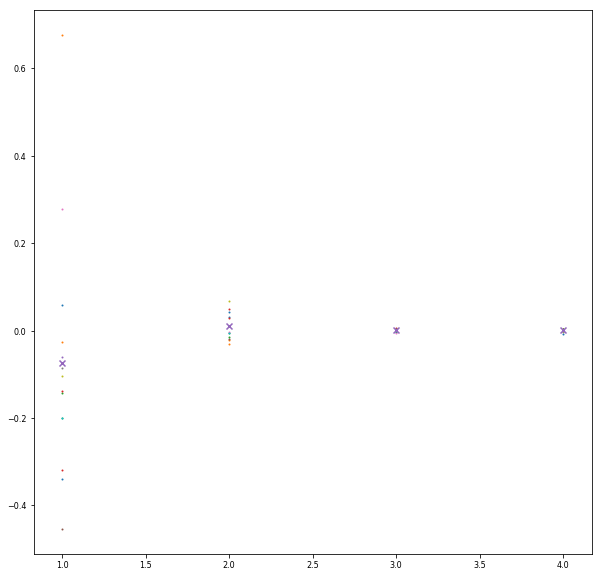

In [55]:
plt.figure(figsize = (10, 10))
for i in range(len(results)):
    plt.scatter([1, 2, 3, 4], results[i], s = 1)
plt.scatter([1, 2, 3, 4], np.mean(results, axis = 0), marker = 'x')
print(np.mean(results, axis = 0))
print(len(results))

In [59]:
t_i = time.clock()
S = SR.Strings(C = SR.Constants(Omega_b = 0.25, Omega_c = 0.75, Omega_v = 0, Neff = 0.), S = SR.StringParameters(num_rel = 50, s = 0))
beta1 = S.get_ktau(1, 1., 0.1, None)
beta2 = S.get_ktau(1, 1., 0.1, None)
beta3 = S.get_ktau(1, 1., 0.1, None)
print(S.calculate_correlator_single(beta1, beta2, beta3, loop = int(1.4e6 / 50)))
t_f = time.clock()
print(t_f - t_i)

/home/tomcharnock/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 7.474720e+02
  AccuracyWarning)
100%|██████████| 28000/28000 [5:15:24<00:00,  1.48it/s]  

(0.053549914147939484, 0.020694267790792965, 0.00089725162415098952, 0.0013672964844049071)
18955.79


In [ ]:
A = SR.Approximations([1., 1.], [1., 1., 1.], np.pi)

In [ ]:
import scipy.optimize as so

def func(tau, alpha, B):
    return B * (1. - np.exp(tau)**(1. / B)) / (1. - np.exp(tau)) - alpha

answer = so.fsolve(func, 2., args = (0.7, np.sqrt(3. / 4.)))
print(answer)

In [ ]:
b = np.sqrt(3. / 4.)
alpha = 1.1
x = 1.000000000001
b * (1. - x**(1. / b)) / 1. / (1. - x**(1. / 1.)) - alpha 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 2. * np.pi), np.cos(np.linspace(0, 2. * np.pi)))